In [4]:
import requests
import numpy as np
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [6]:
#скачиваются данные
apple = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&outputsize=full&symbol=AAPL&apikey=P04PHX3MFTX587B8&datatype=csv')  
google = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&outputsize=full&symbol=GOOG&apikey=P04PHX3MFTX587B8&datatype=csv')
fbk = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&outputsize=full&symbol=FB&apikey=P04PHX3MFTX587B8&datatype=csv')

In [7]:
#вырезается всё раньше 2010 года
apple = apple[apple['timestamp'] >'2010']
apple = apple[::-1]
apple.index = apple.index[::-1]

google = google[google['timestamp'] >'2010']
google = google[::-1]
google.index = google.index[::-1]

fbk = fbk[fbk['timestamp'] >'2010']
fbk = fbk[::-1]
fbk.index = fbk.index[::-1]

In [8]:
apple['d_ret'] = apple['adjusted_close'].pct_change()
apple = apple[1:]

google['d_ret'] = google['adjusted_close'].pct_change()
google = google[1:]

fbk['d_ret'] = fbk['adjusted_close'].pct_change()
fbk = fbk[1:]

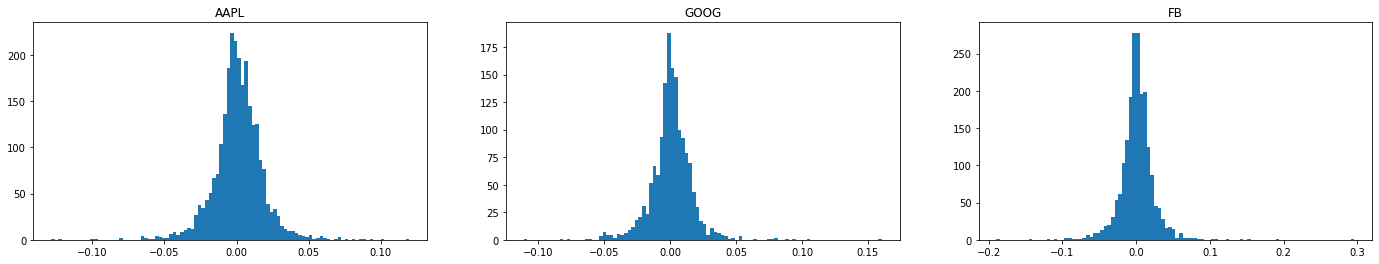

In [9]:
#графики dayly returns
plot = plt.figure(figsize=(24,4))

apl = plot.add_subplot(131, title = 'AAPL')
plt.hist(apple['d_ret'], bins = 100)

ggl = plot.add_subplot(132, title = 'GOOG')
plt.hist(google['d_ret'], bins = 100)

fb = plot.add_subplot(133, title = 'FB')
plt.hist(fbk['d_ret'], bins = 100)

plt.show()

In [10]:
#apple
#google
#fbk

In [11]:
apple['d_ret'].describe()

count    2618.000000
mean        0.001101
std         0.017383
min        -0.128647
25%        -0.006928
50%         0.000904
75%         0.010128
max         0.119808
Name: d_ret, dtype: float64

In [12]:
google['d_ret'].describe()

count    1554.000000
mean        0.000739
std         0.016445
min        -0.111008
25%        -0.006264
50%         0.000691
75%         0.008677
max         0.160524
Name: d_ret, dtype: float64

In [13]:
fbk['d_ret'].describe()

count    2019.000000
mean        0.001151
std         0.023495
min        -0.189609
25%        -0.009159
50%         0.001055
75%         0.011940
max         0.296077
Name: d_ret, dtype: float64

In [14]:
stat, prob = shapiro(apple['d_ret'])
print(stat, prob)

print('AAPL:', end = ' ')
alpha = 0.05
if prob > alpha:
    print('нормальноое распределение')
else:
    print('не нормальное распределение')

0.9324210286140442 6.878102504041279e-33
AAPL: не нормальное распределение


In [15]:
stat, prob = shapiro(google['d_ret'])
print(stat, prob)

print('GOOG:', end = ' ')
alpha = 0.05
if prob > alpha:
    print('нормальноое распределение')
else:
    print('не нормальное распределение')

0.8936521410942078 1.821407690349125e-31
GOOG: не нормальное распределение


In [16]:
stat, prob = shapiro(fbk['d_ret'])
print(stat, prob)

print('FB:', end = ' ')
alpha = 0.05
if prob > alpha:
    print('нормальноое распределение')
else:
    print('не нормальное распределение')

0.8673872351646423 2.472617764971962e-38
FB: не нормальное распределение


In [17]:
#если не установлен fitter

#import subprocess, sys
#subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'fitter'])

In [18]:
from fitter import Fitter

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [71]:
f_apple = Fitter(apple['d_ret'])
f_apple.fit()

SKIPPED alpha distribution (taking more than 30 seconds)
Fitted anglit distribution with error=8328.289521892551)
Fitted arcsine distribution with error=8377.79005051394)
SKIPPED argus distribution (taking more than 30 seconds)
Fitted beta distribution with error=640.9362824105258)
SKIPPED betaprime distribution (taking more than 30 seconds)
Fitted bradford distribution with error=6970.465522130715)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
Fitted cauchy distribution with error=437.52975841413894)
SKIPPED chi distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
Fitted cosine distribution with error=8328.289521892551)
SKIPPED crystalball distribution (taking more than 30 seconds)
Fitted dgamma distribution with error=150.74567332155593)
Fitted dweibull distribution with error=174.5891190872824)
SKIPPED erlang distribution (taking more than 30 seconds)
Fitted expon distri

In [72]:
f_google = Fitter(google['d_ret'])
f_google.fit()

SKIPPED alpha distribution (taking more than 30 seconds)
Fitted anglit distribution with error=8809.634311245494)
SKIPPED arcsine distribution (taking more than 30 seconds)
SKIPPED argus distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
SKIPPED betaprime distribution (taking more than 30 seconds)
Fitted bradford distribution with error=7468.179079177972)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
Fitted cauchy distribution with error=307.6967132933264)
SKIPPED chi distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
Fitted cosine distribution with error=8809.634311245494)
SKIPPED crystalball distribution (taking more than 30 seconds)
Fitted dgamma distribution with error=159.0365064278264)
Fitted dweibull distribution with error=173.59423248046065)
SKIPPED erlang distribution (taking more than 30 seconds)
Fitted expon dist

In [73]:
f_fbk = Fitter(fbk['d_ret'])
f_fbk.fit()

SKIPPED alpha distribution (taking more than 30 seconds)
Fitted anglit distribution with error=2757.578463310867)
SKIPPED arcsine distribution (taking more than 30 seconds)
SKIPPED argus distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED bradford distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
Fitted cauchy distribution with error=115.64370607922812)
SKIPPED chi distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
Fitted cosine distribution with error=3477.174733573149)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED dgamma distribution (taking more than 30 seconds)
SKIPPED dweibull distribution (taking more than 30 seconds)
SKIPPED erlang distribution (taking more than 30 seconds)
Fitted expon d

In [26]:
f_a = Fitter(apple['d_ret'], distributions=['t', 'norm'])
f_a.fit()

Fitted t distribution with error=112.99192240365547)
Fitted norm distribution with error=643.3904686496073)


In [27]:
f_g = Fitter(google['d_ret'], distributions=['t', 'norm'])
f_g.fit()

Fitted t distribution with error=194.90342878165993)
Fitted norm distribution with error=1089.738239540742)


In [28]:
f_fbk = Fitter(fbk['d_ret'], distributions=['t', 'norm'])
f_fbk.fit()

Fitted t distribution with error=36.13857664240216)
Fitted norm distribution with error=420.93401750161627)


,sumsquare_error,aic,bic,kl_div
hypsecant,130.748532,390.808756,-7826.121935,inf
dgamma,150.745673,335.689314,-7445.805272,inf
dweibull,174.589119,338.904340,-7061.521883,inf
genlogistic,194.052687,482.023579,-6784.919684,inf
logistic,197.202000,497.324093,-6750.658697,inf


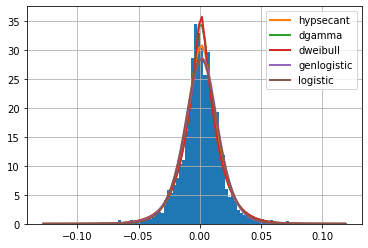

In [74]:
#с минимальными отклонениями
f_apple.summary()

,sumsquare_error,aic,bic,kl_div
dgamma,159.036506,539.302952,-3516.948172,inf
laplace,160.830153,524.972565,-3506.879089,inf
dweibull,173.594232,504.160630,-3380.925867,inf
gennorm,176.004735,444.312747,-3359.509497,inf
hypsecant,275.207034,663.472590,-2672.646615,inf


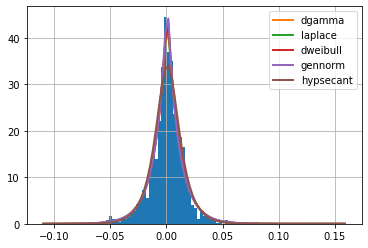

In [75]:
f_google.summary()

,sumsquare_error,aic,bic,kl_div
laplace,41.470052,974.875522,-7824.489639,inf
gennorm,62.395292,810.641506,-6992.489856,inf
hypsecant,65.529173,1177.219384,-6901.206414,inf
genlogistic,113.845531,1427.663002,-5778.960097,inf
cauchy,115.643706,228.390989,-5754.945016,inf


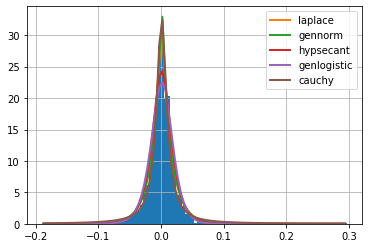

In [86]:
f_fbk.summary()

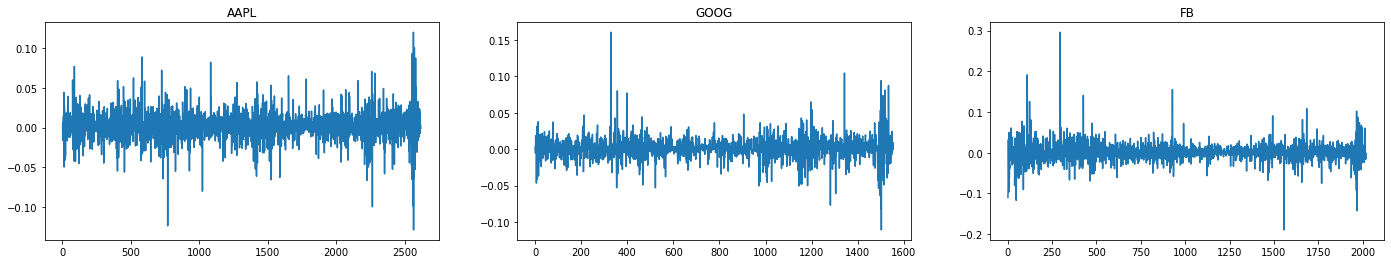

In [20]:
plot = plt.figure(figsize=(24,4))

apl = plot.add_subplot(131, title = 'AAPL')
plt.plot(apple['d_ret'])

ggl = plot.add_subplot(132, title = 'GOOG')
plt.plot(google['d_ret'])

fb = plot.add_subplot(133, title = 'FB')
plt.plot(fbk['d_ret'])

plt.show()

По графикам видно, что распределение доходностей стационарно по времени, так как по крайней мере mean не меняется

Проверяю стационарность доходностей по времени с помощью теста Дики-Фуллера

In [21]:
from statsmodels.tsa.stattools import adfuller

In [29]:
res_a = adfuller(apple['d_ret'])

In [30]:
if res_a[0] < res_a[4]['5%']: 
    print('Доходности AAPL стационарны')
else:
    print('Доходности AAPL не стационарны')

Доходности AAPL стационарны


In [31]:
res_g = adfuller(google['d_ret'])

if res_g[0] < res_g[4]['5%']: 
    print('Доходности GOOG стационарны')
else:
    print('Доходности GOOG не стационарны')

Доходности GOOG стационарны


In [32]:
res_f = adfuller(fbk['d_ret'])

if res_f[0] < res_f[4]['5%']: 
    print('Доходности FB стационарны')
else:
    print('Доходности FB не стационарны')

Доходности FB стационарны


Для поиска взаимосвязей между прошлыми и будущими значениями используется функция построения графика автокорреляций

In [33]:
from statsmodels.graphics.tsaplots import plot_acf

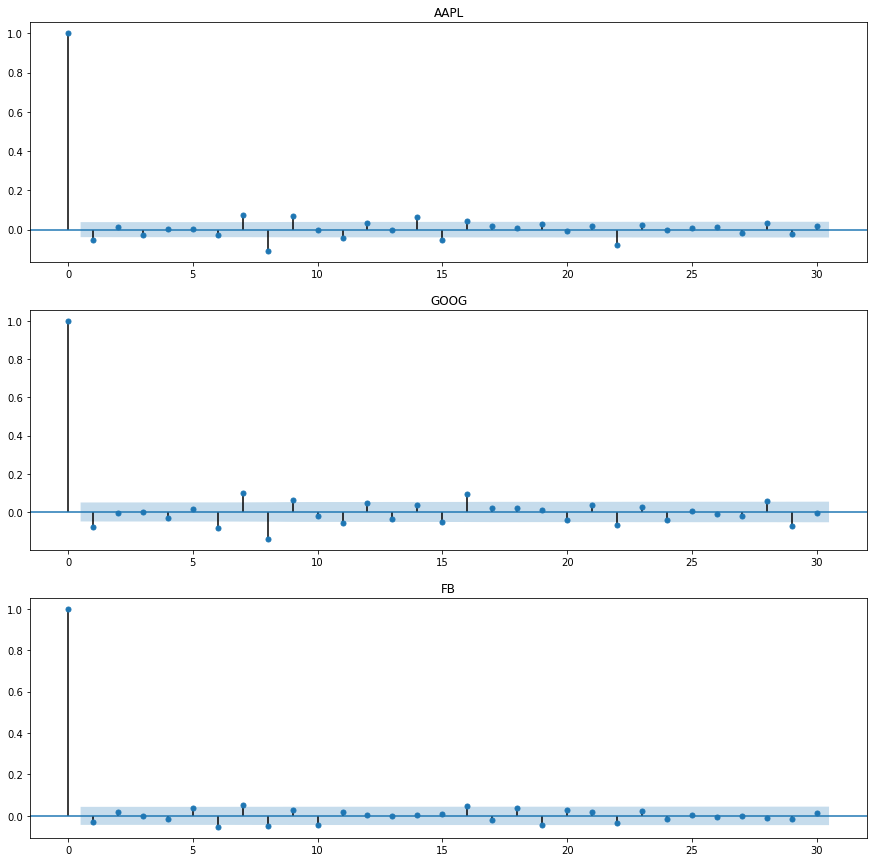

In [34]:
plot = plt.figure(figsize=(15,15))

sp_a = plot.add_subplot(311)
ac_a = plot_acf(apple['d_ret'], lags=30, ax=sp_a, title = 'AAPL')

sp_g = plot.add_subplot(312)
ac_g = plot_acf(google['d_ret'], lags=30, ax=sp_g, title = 'GOOG')

sp_f = plot.add_subplot(313)
ac_f = plot_acf(fbk['d_ret'], lags=30, ax=sp_f, title = 'FB')

У доходностей акций заметна корреляция на 6, 7 и 8 день (для AAPL и GOOG особенно 8 день), что может быть связано с возобновлением торгов после выходных(?)

Численные коэффициэнты можно посмотреть через ARMA

In [35]:
from statsmodels.tsa.arima_model import ARMA

In [58]:
arma_a = ARMA(apple['d_ret'], order=(10,1))

In [59]:
arma_a.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  d_ret   No. Observations:                 2618
Model:                    ARMA(10, 1)   Log Likelihood                6928.861
Method:                       css-mle   S.D. of innovations              0.017
Date:                Sat, 30 May 2020   AIC                         -13831.723
Time:                        17:50:26   BIC                         -13755.411
Sample:                             0   HQIC                        -13804.083
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0011      0.000      3.412      0.001       0.000       0.002
ar.L1.d_ret     -0.8301      0.100     -8.281      0.000      -1.027      -0.634
ar.L2.d_ret     -0.0221      0.026     -0.860      0.390      -0.072       0.028
ar.L3.d_ret     -0.0260      0.025     -1.025      0.306      -0.076       0.024
ar.L4.d_ret     -0.0156      0.025     -0.613      0.540      -0.066       0.034
ar.L5.d_ret      0.0011      0.025      0.045      0.964      -0.048       0.051
ar.L6.d_ret     -0.0249      0.025     -0.984      0.325      -0.075       0.025
ar.L7.d_ret      0.0495      0.025      1.947      0.052      -0.000       0.099
ar.L8.d_ret     -0.0480      0.026     -1.836      0.066      -0.099       0.003
ar.L9.d_ret     -0.0234      0.027     -0.858      0.391      -0.077       0.030
ar.L10.d_ret     0.0764      0.020      3.908      0.000       0.038       0.115
ma.L1.d_ret      0.7956      0.099      8.037      0.000       0.602       0.990
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.1547           -0.0000j            1.1547           -0.5000
AR.2            -1.0596           -0.4800j            1.1632           -0.4323
AR.3            -1.0596           +0.4800j            1.1632            0.4323
AR.4            -0.4851           -1.1418j            1.2406           -0.3139
AR.5            -0.4851           +1.1418j            1.2406            0.3139
AR.6             0.3883           -1.2865j            1.3438           -0.2034
AR.7             0.3883           +1.2865j            1.3438            0.2034
AR.8             1.4783           -0.0000j            1.4783           -0.0000
AR.9             1.1481           -0.8492j            1.4280           -0.1014
AR.10            1.1481           +0.8492j            1.4280            0.1014
MA.1            -1.2569           +0.0000j            1.2569            0.5000
------------------------------------------------------------------------------
"""

In [60]:
arma_g = ARMA(google['d_ret'], order=(10,1))
arma_g.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  d_ret   No. Observations:                 1554
Model:                    ARMA(10, 1)   Log Likelihood                4213.691
Method:                       css-mle   S.D. of innovations              0.016
Date:                Sat, 30 May 2020   AIC                          -8401.381
Time:                        17:59:37   BIC                          -8331.850
Sample:                             0   HQIC                         -8375.524
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0007      0.000      2.297      0.022       0.000       0.001
ar.L1.d_ret      0.4461      0.271      1.648      0.099      -0.084       0.977
ar.L2.d_ret     -0.0095      0.031     -0.305      0.760      -0.071       0.052
ar.L3.d_ret      0.0235      0.028      0.829      0.407      -0.032       0.079
ar.L4.d_ret     -0.0396      0.027     -1.464      0.143      -0.093       0.013
ar.L5.d_ret      0.0224      0.028      0.786      0.432      -0.033       0.078
ar.L6.d_ret     -0.0854      0.027     -3.156      0.002      -0.138      -0.032
ar.L7.d_ret      0.1200      0.035      3.442      0.001       0.052       0.188
ar.L8.d_ret     -0.1717      0.035     -4.963      0.000      -0.240      -0.104
ar.L9.d_ret      0.1161      0.045      2.567      0.010       0.027       0.205
ar.L10.d_ret    -0.0602      0.027     -2.251      0.024      -0.113      -0.008
ma.L1.d_ret     -0.4966      0.270     -1.838      0.066      -1.026       0.033
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0528           -0.4663j            1.1515           -0.4336
AR.2            -1.0528           +0.4663j            1.1515            0.4336
AR.3            -0.5107           -1.1664j            1.2733           -0.3157
AR.4            -0.5107           +1.1664j            1.2733            0.3157
AR.5             0.3039           -1.4199j            1.4521           -0.2164
AR.6             0.3039           +1.4199j            1.4521            0.2164
AR.7             1.2293           -0.4095j            1.2957           -0.0512
AR.8             1.2293           +0.4095j            1.2957            0.0512
AR.9             0.9954           -1.0925j            1.4779           -0.1324
AR.10            0.9954           +1.0925j            1.4779            0.1324
MA.1             2.0137           +0.0000j            2.0137            0.0000
------------------------------------------------------------------------------
"""